<a href="https://colab.research.google.com/github/gongx030/etv2_pioneer/blob/master/Pathway_Etv2_peaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pathway analysis of late, early and sustained Etv2 peaks
by Wuming Gong



In [40]:
start_time0 <- Sys.time()

## Install R packages

In [41]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'GenomicRanges', 'rtracklayer', 'EnrichedHeatmap', 'BSgenome.Mmusculus.UCSC.mm10',
  'circlize', 'ChIPseeker', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'GO.db'
), Ncpus = 2)

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'GenomicRanges', 'rtracklayer', 'EnrichedHeatmap',
  'BSgenome.Mmusculus.UCSC.mm10', 'circlize', 'ChIPseeker',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'GO.db'

Old packages: 'htmlwidgets', 'ps', 'readr', 'foreign'



In [42]:
library(GenomicRanges)
library(circlize)
#library(VennDiagram)
library(dplyr)
#library(grid)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(GO.db)
library(EnrichedHeatmap)
library(rtracklayer)

## Read a combined Etv2 ChIP-seq peak set

In [43]:
all_etv2_peaks_url <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/all_Etv2_peaks.rds'
gr <- readRDS(gzcon(url(all_etv2_peaks_url)))
gr
colnames(gr$group)

GRanges object with 162010 ranges and 4 metadata columns:
           seqnames            ranges strand |
              <Rle>         <IRanges>  <Rle> |
       [1]     chr1   3037784-3037983      * |
       [2]     chr1   3263790-3263989      * |
       [3]     chr1   3344682-3344881      * |
       [4]     chr1   3460640-3460839      * |
       [5]     chr1   3490314-3490513      * |
       ...      ...               ...    ... .
  [162006]     chrY 90828936-90829135      * |
  [162007]     chrY 90836259-90836458      * |
  [162008]     chrY 90841624-90841823      * |
  [162009]     chrY 90842563-90842762      * |
  [162010]     chrY 90843810-90844009      * |
                                                                                                                 peak_id
                                                                                                             <character>
       [1]      /panfs/roc/scratch/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=2

[1] "MEF_Dox_d1_Etv2" "MEF_Dox_d2_Etv2" "MEF_Dox_d7_Etv2" "EB_Dox_3h_Etv2" 
[5] "EB_Dox_12h_Etv2"

## Examine the endothelial and neural genes near the late/early/sustained Etv2 peaks in both EB and MEF

In [44]:
anno <- annotatePeak(
  gr, tssRegion = c(-5000, 1000), 
  TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene, 
  annoDb = 'org.Mm.eg.db'
)

>> preparing features information...		 2020-10-07 10:06:00 PM 
>> identifying nearest features...		 2020-10-07 10:06:00 PM 
>> calculating distance from peak to TSS...	 2020-10-07 10:06:04 PM 
>> assigning genomic annotation...		 2020-10-07 10:06:04 PM 
>> adding gene annotation...			 2020-10-07 10:06:10 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2020-10-07 10:06:11 PM 
>> done...					 2020-10-07 10:06:11 PM 


In [45]:
anno <- as.data.frame(anno)

In [46]:
head(anno)

,seqnames,start,end,width,strand,peak_id,score,source,group.MEF_Dox_d1_Etv2,group.MEF_Dox_d2_Etv2,⋯,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,chr1,3037784,3037983,200,*,/panfs/roc/scratch/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Etv2_peak_1,16.22768,MEF_Dox_d2_Etv2,TRUE,TRUE,⋯,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,633515,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4
2,chr1,3263790,3263989,200,*,/panfs/roc/scratch/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_3h_Etv2_peak_1,8.36521,EB_Dox_3h_Etv2,FALSE,FALSE,⋯,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,407509,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4
3,chr1,3344682,3344881,200,*,/panfs/roc/scratch/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Etv2_peak_2,9.73217,MEF_Dox_d2_Etv2,FALSE,TRUE,⋯,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,326617,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4
4,chr1,3460640,3460839,200,*,/panfs/roc/scratch/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Etv2_peak_3,3.92081,MEF_Dox_d2_Etv2,FALSE,TRUE,⋯,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,210659,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4
5,chr1,3490314,3490513,200,*,/panfs/roc/scratch/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Etv2_peak_4,12.29730,MEF_Dox_d2_Etv2,TRUE,TRUE,⋯,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,180985,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4
6,chr1,3499647,3499846,200,*,/panfs/roc/scratch/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Etv2_peak_5,1.48802,MEF_Dox_d2_Etv2,FALSE,TRUE,⋯,3214482,3671498,457017,2,497097,ENSMUST00000070533.4,171652,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4


In [47]:
groups <- list(	# six groups of genes 
	EB_late = unique(anno$geneId[!anno$group.EB_Dox_3h_Etv2 & anno$group.EB_Dox_12h_Etv2]),
	EB_early = unique(anno$geneId[anno$group.EB_Dox_3h_Etv2 & !anno$group.EB_Dox_12h_Etv2]),
	EB_sustained = unique(anno$geneId[anno$group.EB_Dox_3h_Etv2 & anno$group.EB_Dox_12h_Etv2]),
	MEF_late  = unique(anno$geneId[!anno$group.MEF_Dox_d1_Etv2 & anno$group.MEF_Dox_d7_Etv2]),
	MEF_early  = unique(anno$geneId[anno$group.MEF_Dox_d1_Etv2 & !anno$group.MEF_Dox_d7_Etv2]),
	MEF_sustained = unique(anno$geneId[anno$group.MEF_Dox_d1_Etv2 & anno$group.MEF_Dox_d7_Etv2])
)
gos <- c(
	'endothelium development' = 'GO:0003158',
	'vasculature development' = 'GO:0001944',
	'nervous system development' = 'GO:0007399',
	'cardiovascular system development' =  'GO:0072358',
	'stem cell population maintenance' = 'GO:0019827',
	'heart development' = 'GO:0007507',
	'blood vessel development' = 'GO:0001568'
)

In [48]:
gs <- mget(gos, org.Mm.egGO2ALLEGS)
names(gs) <- names(gos)

In [49]:
x <- do.call('rbind', lapply(groups, function(genes) do.call('cbind', lapply(gs, function(go) sum(genes %in% go)))))
rownames(x) <- names(groups)
x

,endothelium development,vasculature development,nervous system development,cardiovascular system development,stem cell population maintenance,heart development,blood vessel development
EB_late,31,192,465,195,25,163,184
EB_early,45,279,928,287,79,251,272
EB_sustained,61,293,885,300,78,245,280
MEF_late,31,178,444,183,23,147,172
MEF_early,114,701,2164,714,147,582,669
MEF_sustained,76,405,1058,412,91,333,386


In [50]:
for (i in 1:length(gs)){
  cat(sprintf('total genes in %s:%d\n', names(gs)[i], length(gs[[i]])))
}

total genes in endothelium development:147
total genes in vasculature development:1098
total genes in nervous system development:4007
total genes in cardiovascular system development:1117
total genes in stem cell population maintenance:200
total genes in heart development:900
total genes in blood vessel development:1032


In [51]:
for (i in 1:length(groups)){
  cat(sprintf('total genes in %s:%d\n', names(groups)[i], length(groups[[i]])))
}

total genes in EB_late:2703
total genes in EB_early:5392
total genes in EB_sustained:5825
total genes in MEF_late:2997
total genes in MEF_early:19448
total genes in MEF_sustained:8054


In [52]:
x <- do.call('rbind', lapply(groups, function(genes) do.call('cbind', lapply(gs, function(go) sum(genes %in% go) / length(genes)))))
rownames(x) <- names(groups)
t(x)

,EB_late,EB_early,EB_sustained,MEF_late,MEF_early,MEF_sustained
endothelium development,0.011468738,0.008345697,0.01047210,0.010343677,0.005861785,0.009436305
vasculature development,0.071032186,0.051743323,0.05030043,0.059392726,0.036044838,0.050285572
nervous system development,0.172031077,0.172106825,0.15193133,0.148148148,0.111271082,0.131363298
cardiovascular system development,0.072142064,0.053227003,0.05150215,0.061061061,0.036713287,0.051154706
stem cell population maintenance,0.009248983,0.014651335,0.01339056,0.007674341,0.007558618,0.011298734
heart development,0.060303367,0.046550445,0.04206009,0.049049049,0.029925956,0.041345915
blood vessel development,0.068072512,0.050445104,0.04806867,0.057390724,0.034399424,0.047926496


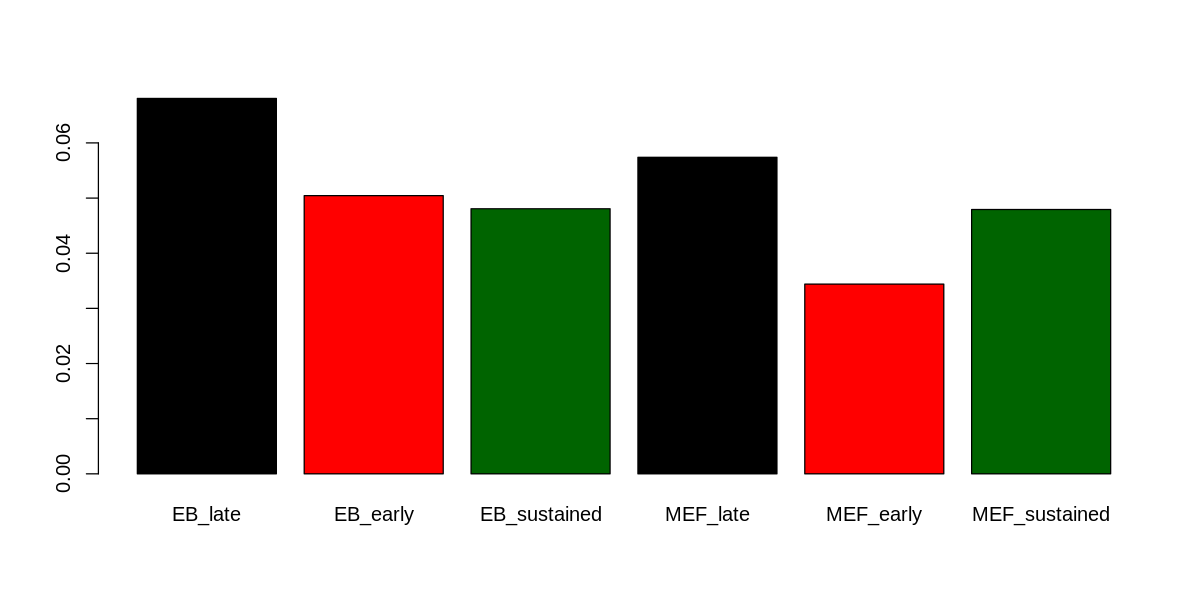

In [53]:
options(repr.plot.width = 10, repr.plot.height = 5)
barplot(x[, 'blood vessel development'], col = c('black', 'red', 'darkgreen'))

## Overlapped late peaks

In [54]:
cat(sprintf('number of unique genes near common late  Etv2 peaks: %d\n', length(unique(anno$geneId[anno$group.EB_Dox_12h_Etv2 & anno$group.MEF_Dox_d7_Etv2]))))
cat(sprintf('number of unique genes near late MEF Etv2 peaks: %d\n', length(unique(anno$geneId[!anno$group.EB_Dox_12h_Etv2 & anno$group.MEF_Dox_d7_Etv2]))))
cat(sprintf('number of unique genes near late EB Etv2 peaks: %d\n', length(unique(anno$geneId[anno$group.EB_Dox_12h_Etv2 & !anno$group.MEF_Dox_d7_Etv2]))))

number of unique genes near common late  Etv2 peaks: 4033
number of unique genes near late MEF Etv2 peaks: 6924
number of unique genes near late EB Etv2 peaks: 4354


In [55]:
cat(sprintf('number of common late Etv2 peaks: %d\n', sum(gr$group[, 'EB_Dox_12h_Etv2'] & gr$group[, 'MEF_Dox_d7_Etv2'])))
cat(sprintf('number of MEF specific late Etv2 peaks: %d\n', sum(!gr$group[, 'EB_Dox_12h_Etv2'] & gr$group[, 'MEF_Dox_d7_Etv2'])))
cat(sprintf('number of EB specific late Etv2 peaks: %d\n', sum(gr$group[, 'EB_Dox_12h_Etv2'] & !gr$group[, 'MEF_Dox_d7_Etv2'])))

number of common late Etv2 peaks: 4790
number of MEF specific late Etv2 peaks: 11602
number of EB specific late Etv2 peaks: 6373


In [56]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] EnrichedHeatmap_1.18.2                   
 [2] ComplexHeatmap_2.4.3                     
 [3] GO.db_3.11.4                             
 [4] org.Mm.eg.db_3.11.4                      
 [5] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0

In [57]:
Sys.time() - start_time0

Time difference of 3.971081 mins